In [1]:
import pandas as pd
import numpy as np
import seaborn.objects as so
nutrition = pd.read_csv("./data/Nutrition__factor.csv")
print("letter recognition loaded")
print("Shape of the letter recognition dataset", nutrition.shape)
print("Dataset info", nutrition.info())

letter recognition loaded
Shape of the letter recognition dataset (106260, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float6

In [2]:
nutrition.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [3]:
#Remove the hidden spaces or invisible characters from column names.

nutrition.columns = nutrition.columns.str.strip()

# List of unwanted columns
columns_remove= [
    "YearEnd",
     "Datasource",
    "Data_Value_Unit",
    "Data_Value_Alt",
     "Data_Value_Footnote_Symbol",
    "Data_Value_Footnote",
    "Data_Value_Type",
    "Total",
     "ClassID",
    "TopicID",
    "QuestionID",
     "DataValueTypeID",
    "LocationID",
    "StratificationCategoryId1",
    "StratificationID1",
]

# Droping the unwanted columns
nutrition = nutrition.drop(columns = columns_remove, errors = "ignore")
nutrition.head(1)
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                106260 non-null  int64  
 1   LocationAbbr             106260 non-null  object 
 2   LocationDesc             106260 non-null  object 
 3   Class                    106260 non-null  object 
 4   Topic                    106260 non-null  object 
 5   Question                 106260 non-null  object 
 6   Data_Value               93505 non-null   float64
 7   Low_Confidence_Limit     93505 non-null   float64
 8   High_Confidence_Limit    93505 non-null   float64
 9   Sample_Size              93505 non-null   float64
 10  Age(years)               22770 non-null   object 
 11  Education                15180 non-null   object 
 12  Sex                      7590 non-null    object 
 13  Income                   26565 non-null   object 
 14  Race

In [4]:
# Removing the duplicates
duplicate_data = nutrition.duplicated().sum()
nutrition = nutrition.drop_duplicates()
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                 12755
Low_Confidence_Limit       12755
High_Confidence_Limit      12755
Sample_Size                12755
Age(years)                 83490
Education                  91080
Sex                        98670
Income                     79695
Race/Ethnicity             75900
GeoLocation                 1932
StratificationCategory1        0
Stratification1                0
dtype: int64

In [5]:
# Dropping null datavalue
nutrition = nutrition.dropna(subset=["Data_Value"])
nutrition.shape

(93505, 18)

In [6]:
# checking remaining null values. Socio-demographic fields are missing. but it is not error. It only exist for that stratification
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1                0
dtype: int64

In [7]:
# Standardizing missing entries
nutrition = nutrition.replace(r'^\s*$',pd.NA,regex=True)
nutrition.head(1)

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"


In [8]:
nutrition.isna().sum()
#checking the data types
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [9]:
# Handling the categorical columns consistency
for column in ["Class","Topic","StratificationCategory1","Stratification1","LocationDesc",]:
    print(f"\nTotal unique values count in '{column}':{nutrition[column].nunique()}")
    print(f"\n Unique values in  {column}:{nutrition[column].unique()}")


Total unique values count in 'Class':3

 Unique values in  Class:['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']

Total unique values count in 'Topic':3

 Unique values in  Topic:['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']

Total unique values count in 'StratificationCategory1':6

 Unique values in  StratificationCategory1:['Income' 'Age (years)' 'Race/Ethnicity' 'Education' 'Sex' 'Total']

Total unique values count in 'Stratification1':28

 Unique values in  Stratification1:['$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' '18 - 24' '2 or more races'
 '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older'
 'American Indian/Alaska Native' 'College graduate' 'Data not reported'
 'Female' 'High school graduate' 'Hispanic' 'Less than $15,000'
 'Less than high school' 'Male' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Some college or technical school' 'Total' 'Oth

In [10]:
# Unique values in  Stratification1 contain "Data not reported"
#Count of data  not reported
import numpy as np 
count_data_not_reported = (nutrition["Stratification1"] == "Data not reported").sum()
nutrition["Stratification1"].value_counts()
nutrition["Stratification1"] = nutrition["Stratification1"].replace("Data not reported",np.nan)

In [11]:
#cleaned data 
cleaned_data= nutrition
cleaned_data

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106255,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,33.2,28.9,37.8,1347.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
106256,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,20.5,14.0,29.1,237.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
106257,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,23.7,10.6,44.7,68.0,NaN,NaN,NaN,NaN,Other,"(18.335765, -64.896335)",Race/Ethnicity,Other
106258,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,28.1,20.5,37.2,397.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [12]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [13]:
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1             3684
dtype: int64

In [14]:
ols_data = nutrition.copy()

# Filter only obesity rows and drop missing values
ols_data = ols_data[ols_data["Class"] == "Obesity / Weight Status"].copy()
ols_data = ols_data.dropna(subset=["Data_Value", "Income"])

# Convert Income (categorical) to numeric codes for OLS
ols_data["income_code"] = ols_data["Income"].astype("category").cat.codes

print(ols_data[["Income", "income_code"]].head())

               Income  income_code
0   $15,000 - $24,999            0
1   $25,000 - $34,999            1
2   $35,000 - $49,999            2
3   $50,000 - $74,999            3
4  $75,000 or greater            4


In [15]:

x = ols_data["income_code"].values
y = ols_data["Data_Value"].values

b1_ = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
b0_ = y.mean() - b1_ * x.mean()


print("Manual OLS slope (b1):", b1_)
print("Manual OLS intercept (b0):", b0_)

Manual OLS slope (b1): -0.38596792375486777
Manual OLS intercept (b0): 34.189648338710285


In [16]:
x_line = np.arange(int(ols_data["income_code"].min()), int(ols_data["income_code"].max()) + 1)
ols_line_data = pd.DataFrame({"x": x_line, "y": b0_ + b1_ * x_line})

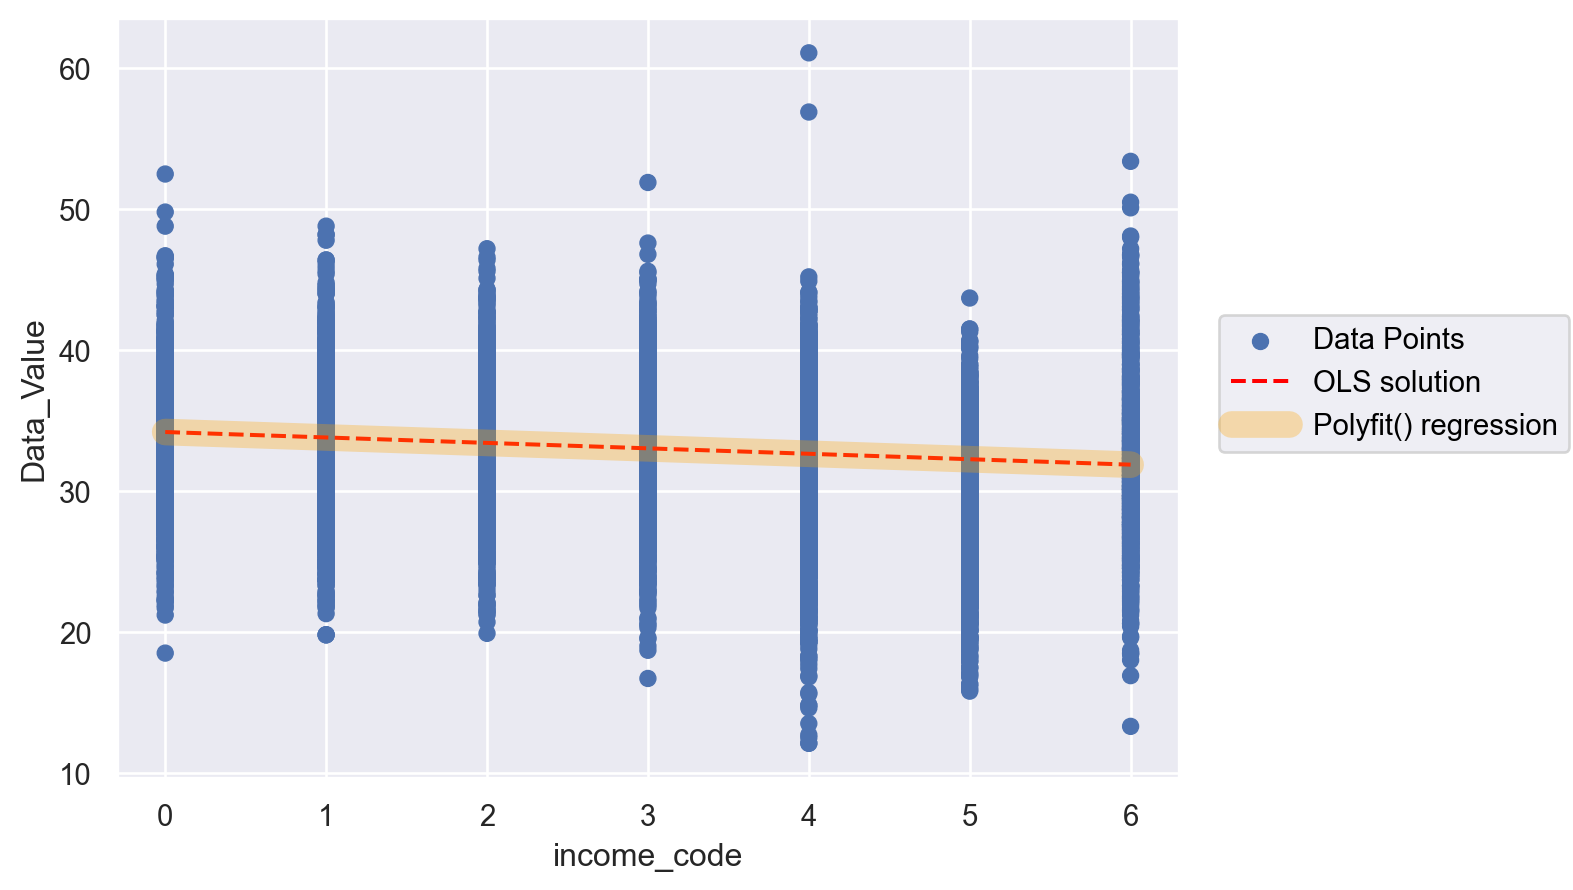

In [17]:
(
    so.Plot(
        ols_data,
        x="income_code",
        y="Data_Value",
        
    )
    .add(so.Dot(), label="Data Points")
    .add(
        so.Line(color="red", linestyle="--"),
        data = pd.DataFrame({'x': np.arange(ols_data["income_code"].max()+1)}).assign(y=lambda d: b0_ + b1_ * d['x']),
        x='x',
        y='y',
        label= 'OLS solution'
    )
    .add(so.Line(color='orange', linewidth=10, alpha=0.3),
        so.PolyFit(order=1),
        label='Polyfit() regression'
        )
)

In [18]:
rss_df = (
    ols_data
    .filter(['income_code', 'Data_Value'])
    .assign(
        obesity_pred = lambda d: b0_ + b1_ * d['income_code'],
        residual = lambda d: d['Data_Value'] - d['obesity_pred'],
        residual_squared = lambda d: d['residual']**2
    )
    .agg({
        'residual_squared': 'sum'
    })
)
print("Residual Sum of Squares (RSS):", rss_df['residual_squared'])

Residual Sum of Squares (RSS): 255755.97333930264


In [19]:
import statsmodels.formula.api as smf
result = smf.ols('Data_Value ~ income_code', data=ols_data).fit()


print(result.summary())   
print(result.params)
print(f"Manual Calculation -> Intercept (b0): {b0_}, Slope (b1): {b1_}")




                            OLS Regression Results                            
Dep. Variable:             Data_Value   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.31e-49
Time:                        15:33:34   Log-Likelihood:                -29776.
No. Observations:                9756   AIC:                         5.956e+04
Df Residuals:                    9754   BIC:                         5.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.1896      0.093    365.846      

In [20]:
print(result.ssr)

255755.9733393026


In [21]:
TSS = sum((ols_data['Data_Value'] - ols_data['Data_Value'].mean())**2)


RSS = result.ssr


R2 = 1 - (RSS / TSS)
print("Manual R²:", R2)


print("Statsmodels R²:", result.rsquared)
print(f"Model can explain {R2*100:.2f}% of variability in obesity ")

Manual R²: 0.02222973435201636
Statsmodels R²: 0.022229734352016473
Model can explain 2.22% of variability in obesity 


In [22]:
#logistic reg
import pandas as pd

reg_df = nutrition.copy()

reg_df = reg_df[reg_df["Class"] == "Obesity / Weight Status"].copy()


reg_df = reg_df.dropna(subset=["Data_Value", "Income"])


median_obesity = reg_df["Data_Value"].median()
reg_df = reg_df.assign(
    obesity_binary=lambda d: (d["Data_Value"] > median_obesity).astype(int)
)


income_dummies = pd.get_dummies(reg_df["Income"], drop_first=True, dtype=int)
reg_df = pd.concat([reg_df, income_dummies], axis=1)


reg_df.head()

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,...,GeoLocation,StratificationCategory1,Stratification1,obesity_binary,"$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",Data not reported,"Less than $15,000"
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,...,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999",1,0,0,0,0,0,0
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,...,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999",1,1,0,0,0,0,0
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,...,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999",0,0,1,0,0,0,0
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,...,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999",1,0,0,1,0,0,0
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,...,"(32.840571122, -86.631860762)",Income,"$75,000 or greater",0,0,0,0,1,0,0


In [23]:
reg_df['obesity_binary'].value_counts(normalize=True)

obesity_binary
0    0.504818
1    0.495182
Name: proportion, dtype: float64

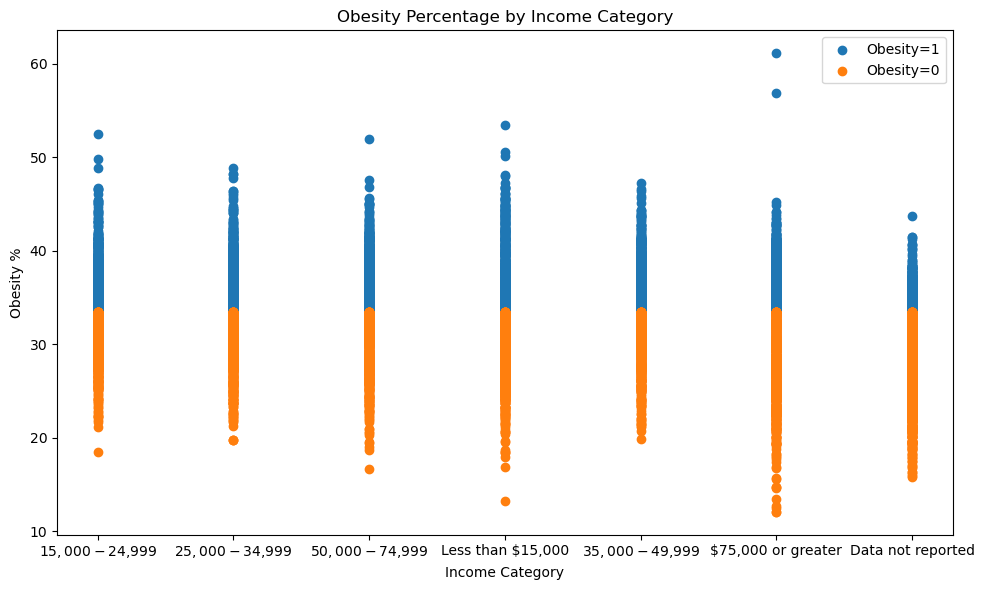

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for val in reg_df['obesity_binary'].unique():
    subset = reg_df[reg_df['obesity_binary']==val]
    plt.scatter(subset['Income'], subset['Data_Value'], label=f'Obesity={val}')
plt.xlabel('Income Category')
plt.ylabel('Obesity %')
plt.title('Obesity Percentage by Income Category')
plt.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

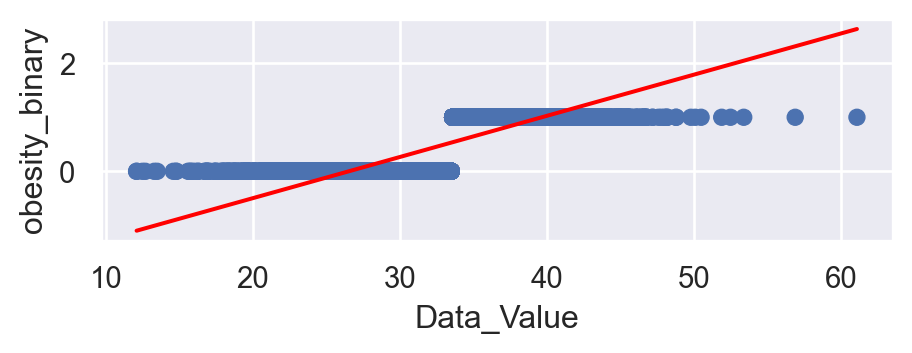

In [25]:
import seaborn.objects as so

(
    so.Plot(
        reg_df,
        x='Data_Value',
        y='obesity_binary'
    )
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(order=1))
    .layout(size=(5,2))
)

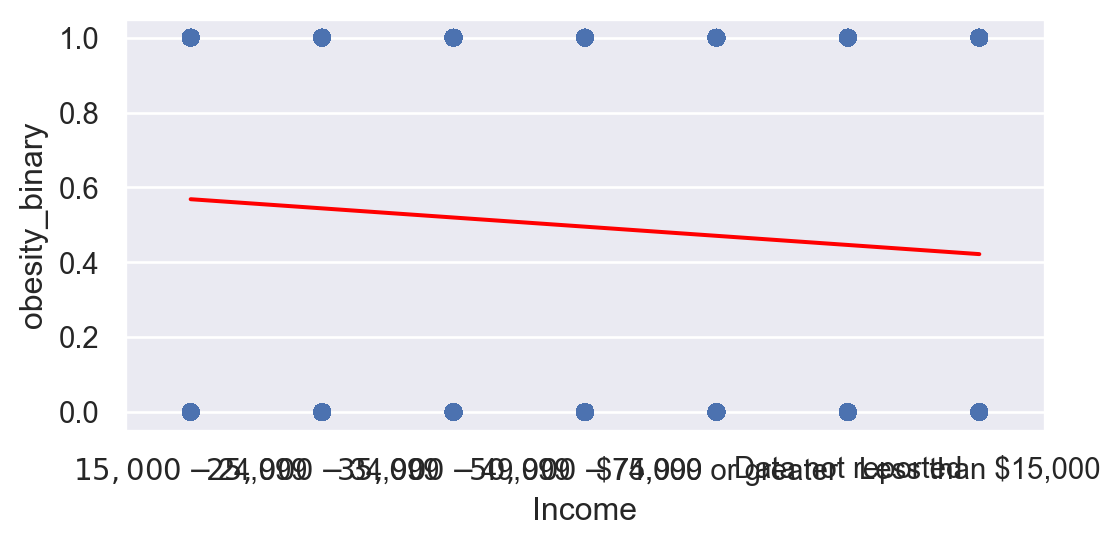

In [26]:
import seaborn.objects as so

(
    so.Plot(
        reg_df,
        x='Income',
        y='obesity_binary'
    )
    .add(so.Dot())
    .add(so.Line(color='red'),so.PolyFit(order=1) )  
    .layout(size=(6,3))
)

In [27]:
import statsmodels.formula.api as smf
results = smf.logit(
    formula='obesity_binary ~ Income',
    data=reg_df
).fit()


Optimization terminated successfully.
         Current function value: 0.667878
         Iterations 5


In [28]:
reg_df['income_code'] = reg_df['Income'].astype('category').cat.codes

# Logistic regression using numeric income
results = smf.logit(formula='obesity_binary ~ income_code', data=reg_df).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.688307
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         obesity_binary   No. Observations:                 9756
Model:                          Logit   Df Residuals:                     9754
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                0.006917
Time:                        15:33:38   Log-Likelihood:                -6715.1
converged:                       True   LL-Null:                       -6761.9
Covariance Type:            nonrobust   LLR p-value:                 3.983e-22
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2755      0.037      7.499      0.000       0.204       0.348
income_code    -0.0983    

In [29]:
from sklearn.linear_model import LogisticRegression

clf_model = LogisticRegression()
X = reg_df[['income_code']]
y= reg_df['obesity_binary']

clf_model.fit(X, y)
print(clf_model.coef_, clf_model.intercept_)

[[-0.09833095]] [0.27554115]


In [30]:
y_pred = clf_model.predict(X)
clf_model.predict_proba(X)[:, 1]

array([0.56845274, 0.54418698, 0.51970959, ..., 0.47058833, 0.4461809 ,
       0.42203024])

In [31]:
(
   reg_df.assign(
    obesity_pred_class = clf_model.predict(X),
   
   )
.query('obesity_binary == 1 and obesity_pred_class == 0')
)

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,...,Stratification1,obesity_binary,"$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",Data not reported,"Less than $15,000",income_code,obesity_pred_class
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,...,"$50,000 - $74,999",1,0,0,1,0,0,0,3,0
20,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.5,34.4,42.8,1112.0,...,"Less than $15,000",1,0,0,0,0,0,1,6,0
48,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,25.4,42.9,271.0,...,"Less than $15,000",1,0,0,0,0,0,1,6,0
76,2011,AZ,Arizona,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,26.1,43.1,760.0,...,"Less than $15,000",1,0,0,0,0,0,1,6,0
104,2011,AR,Arkansas,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,28.3,39.7,701.0,...,"Less than $15,000",1,0,0,0,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98508,2023,PR,Puerto Rico,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.3,26.5,47.3,141.0,...,"$75,000 or greater",1,0,0,0,1,0,0,4,0
98519,2023,PR,Puerto Rico,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.2,30.5,38.2,984.0,...,NaN,1,0,0,0,0,1,0,5,0
98535,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.3,27.8,45.8,312.0,...,"$50,000 - $74,999",1,0,0,1,0,0,0,3,0
98536,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,41.4,28.9,55.0,205.0,...,"$75,000 or greater",1,0,0,0,1,0,0,4,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = reg_df[['income_code']]
y = reg_df['obesity_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y
)

clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)
y_proba = clf_model.predict_proba(X_test)[:,1]

(
    pd.DataFrame(
        {
            'y_pred': y_pred,
            'y_true': y_test
        }
    ).query('y_pred != y_true')
)

metrics.accuracy_score(y_test, y_pred)

0.5317753177531775

In [33]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
        columns=['Predicted Negative', 'Predicted Positive'], 
        index=['Actual Negative', 'Actual Positive']
    )
)
print(confusion_matrix)


                 Predicted Negative  Predicted Positive
Actual Negative                 737                 494
Actual Positive                 648                 560
[[737 494]
 [648 560]]


In [34]:
tn = confusion_matrix[0,0]    
tp = confusion_matrix[1,1]      
fn = confusion_matrix[1,0]      
fp = confusion_matrix[0,1]      
acc = (tn + tp) / (tn + tp + fn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
false_alarm = fp / (fp + tn)

print(f"True Negative: {tn} \nTrue Positive: {tp} \nFalse Negative: {fn} \nFalse Positive: {fp} \nAccuracy: {acc} \nRecall: {recall} \nPrecision: {precision}, \nFalse Alarm: {false_alarm}")
# or
print(f"\n", metrics.classification_report(y_test, y_pred))

True Negative: 737 
True Positive: 560 
False Negative: 648 
False Positive: 494 
Accuracy: 0.5317753177531775 
Recall: 0.46357615894039733 
Precision: 0.5313092979127134, 
False Alarm: 0.40129975629569453

               precision    recall  f1-score   support

           0       0.53      0.60      0.56      1231
           1       0.53      0.46      0.50      1208

    accuracy                           0.53      2439
   macro avg       0.53      0.53      0.53      2439
weighted avg       0.53      0.53      0.53      2439



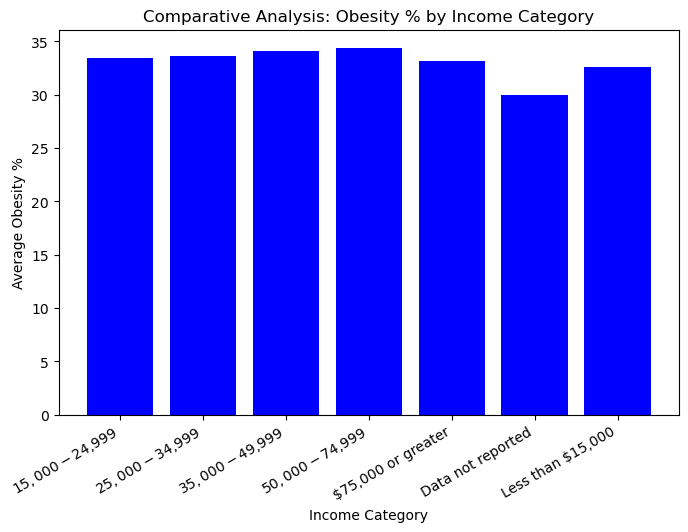

In [35]:
comparative_df = reg_df.groupby('Income')['Data_Value'].mean().reset_index()


plt.figure(figsize=(8,5))
plt.bar(comparative_df['Income'], comparative_df['Data_Value'], color='blue')
plt.xlabel('Income Category')
plt.ylabel('Average Obesity %')
plt.title('Comparative Analysis: Obesity % by Income Category')
plt.xticks(rotation=30, ha='right')
plt.tight_layout
plt.show()

## Summary
#### our objective was to see if adults having high or low obesity based on income category. The logistic regression model was used to classify adults into high or low obesity categories based on income levels.The result shows that income alone is a weak predictor model got the accuracy of 52% with only 46% high obesity cases correctly identified. The precision of predicting high obesity was 52% and false positive rate was 42% that is many low obesity adults were misclasified as high obesity. This says that income has limired effect on predicting obesity levels

#### A comparison of obesity percentages across income levels showed minor variation between categories. These results suggest that income alone does not strongly determine obesity, and factors like lifestyle choices, age, and nutritional habits may be more significant contributors.